In [126]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

file = "Crimes2011-2019 (1).csv"

df = pd.read_csv(file)
df.head()

,Unnamed: 0,Abr,Año,Estado,Mes,Municipio,id_estado,id_municipio,Extorsion,HomicidioCulp,...,rtExtorsion,rtHomicidioCulp,rtHomicidioDolo,rtLesiones,rtRoboCasa,rtRoboNegocio,rtRoboSinViol,rtRoboVehi,rtRoboViol,rtSecuestro
0,2011-01,Ags.,2011,Aguascalientes,1,Aguascalientes,1,1001.0,10.0,4.0,...,1.224257,0.489703,0.979406,25.464545,18.853557,12.242570,21.424497,29.627019,4.529751,0.0
1,2011-01,Ags.,2011,Aguascalientes,1,Asientos,1,1002.0,0.0,0.0,...,0.000000,0.000000,0.000000,4.288338,2.144169,6.432507,2.144169,4.288338,0.000000,0.0
2,2011-01,Ags.,2011,Aguascalientes,1,Calvillo,1,1003.0,0.0,1.0,...,0.000000,1.810884,0.000000,3.621768,3.621768,0.000000,7.243536,3.621768,3.621768,0.0
3,2011-01,Ags.,2011,Aguascalientes,1,Cosío,1,1004.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,13.016565,13.016565,0.000000,19.524847,0.000000,0.0
4,2011-01,Ags.,2011,Aguascalientes,1,Jesús María,1,1005.0,1.0,2.0,...,0.970516,1.941032,0.000000,15.528254,22.321865,6.793611,12.616706,10.675674,0.970516,0.0


In [127]:
crime_df = df.loc[:,["Estado", "Extorsion", "HomicidioCulp", "HomicidioDolo", "Lesiones", "RoboCasa", "RoboNegocio", "RoboSinViol"
               , "RoboVehi", "RoboViol", "Secuestro", "Poblacion", "Fecha"]]

In [128]:
crime_df["Fecha"] = pd.to_datetime(crime_df["Fecha"])
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248763 entries, 0 to 248762
Data columns (total 13 columns):
Estado           248763 non-null object
Extorsion        165899 non-null float64
HomicidioCulp    165899 non-null float64
HomicidioDolo    165899 non-null float64
Lesiones         165899 non-null float64
RoboCasa         165899 non-null float64
RoboNegocio      165899 non-null float64
RoboSinViol      165899 non-null float64
RoboVehi         165899 non-null float64
RoboViol         165899 non-null float64
Secuestro        165899 non-null float64
Poblacion        167862 non-null float64
Fecha            248763 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 24.7+ MB


In [129]:
#crime_df.set_index(crime_df["Fecha"], inplace=True)

In [130]:
crime_by_state = crime_df.groupby("Estado").sum()

In [131]:
crime_by_state["Fecha"] = crime_df["Fecha"].max()

In [132]:
crime_by_state.head()

,Extorsion,HomicidioCulp,HomicidioDolo,Lesiones,RoboCasa,RoboNegocio,RoboSinViol,RoboVehi,RoboViol,Secuestro,Poblacion,Fecha
Estado,,,,,,,,,,,,
Aguascalientes,716.0,1472.0,479.0,29638.0,23268.0,14304.0,31410.0,20203.0,4978.0,37.0,1.294460e+08,2019-05-01
Baja California,2192.0,2198.0,10027.0,52046.0,106715.0,55760.0,41457.0,147816.0,18935.0,224.0,3.502735e+08,2019-05-01
Baja California Sur,995.0,392.0,1253.0,10657.0,21279.0,707.0,32641.0,10733.0,4829.0,6.0,7.652850e+07,2019-05-01
Campeche,253.0,624.0,561.0,1395.0,975.0,904.0,1083.0,2467.0,1024.0,37.0,9.128173e+07,2019-05-01
Chiapas,783.0,4732.0,2607.0,8729.0,5713.0,2964.0,2672.0,11938.0,6637.0,126.0,4.094720e+08,2019-05-01


In [133]:
#Obtener los valores agregados por el total nacional
crime_df.set_index(crime_df["Fecha"], inplace=True)

In [134]:
crime_nacional = crime_df.resample('M').sum()
crime_nacional.head()

,Extorsion,HomicidioCulp,HomicidioDolo,Lesiones,RoboCasa,RoboNegocio,RoboSinViol,RoboVehi,RoboViol,Secuestro,Poblacion
Fecha,,,,,,,,,,,
2011-01-31,308.0,677.0,847.0,8097.0,7985.0,6091.0,8496.0,18371.0,5774.0,93.0,9.613547e+07
2011-02-28,298.0,524.0,760.0,8150.0,7369.0,5722.0,8459.0,17078.0,5684.0,84.0,9.613547e+07
2011-03-31,360.0,579.0,887.0,9335.0,8451.0,6137.0,10284.0,18857.0,6410.0,96.0,9.613547e+07
2011-04-30,282.0,621.0,925.0,8488.0,7675.0,5682.0,8825.0,16120.0,5628.0,92.0,9.613547e+07
2011-05-31,359.0,602.0,1047.0,9451.0,7871.0,5915.0,9373.0,17549.0,6010.0,98.0,9.613547e+07


In [135]:
#guardar data frame de crimen en un csv
crime_nacional.to_csv("Crimen_nal.csv")

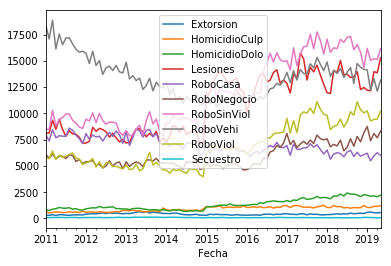

In [136]:
grafica = crime_nacional.plot(y = ["Extorsion","HomicidioCulp","HomicidioDolo","Lesiones","RoboCasa","RoboNegocio","RoboSinViol","RoboVehi", "RoboViol", "Secuestro"])
#grafica

In [121]:
print(ax)
ax.set_ylim(ymin=0, ymax = )

AxesSubplot(0.125,0.125;0.775x0.755)
